In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('K-Means.csv')
df

,name,age,income($)
0,bob,27,70000
1,michaei,29,90000
2,ismail,29,61000
3,kory,28,60000
4,gautam,42,150000
5,david,39,155000
6,andrea,41,160000
7,brad,38,162000
8,angelina,36,156000
9,mohan,35,130000


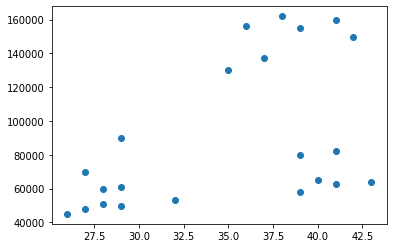

In [3]:
plt.scatter(df['age'], df['income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
y_predicted = km.fit_predict(df[['age', 'income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [7]:
df['cluster']= y_predicted
df.head()

,name,age,income($),cluter,cluster
0,bob,27,70000,1,1
1,michaei,29,90000,1,1
2,ismail,29,61000,2,2
3,kory,28,60000,2,2
4,gautam,42,150000,0,0


No handles with labels found to put in legend.


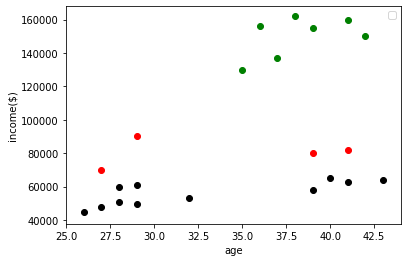

In [9]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]

plt.scatter(df1.age, df1['income($)'], color='green')
plt.scatter(df2.age, df2['income($)'], color='red')
plt.scatter(df3.age, df3['income($)'], color='black')

plt.xlabel('age')
plt.ylabel('income($)')

plt.legend()

In [15]:
scaler = MinMaxScaler()
scaler.fit(df[['income($)']])
df[['income($)']] = scaler.transform(df[['income($)']])


scaler.fit(df[['age']])
df[['age']] = scaler.transform(df[['age']])
df

,name,age,income($),cluter,cluster
0,bob,0.058824,0.213675,1,1
1,michaei,0.176471,0.384615,1,1
2,ismail,0.176471,0.136752,2,2
3,kory,0.117647,0.128205,2,2
4,gautam,0.941176,0.897436,0,0
5,david,0.764706,0.940171,0,0
6,andrea,0.882353,0.982906,0,0
7,brad,0.705882,1.000000,0,0
8,angelina,0.588235,0.948718,0,0
9,mohan,0.529412,0.726496,0,0


In [32]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[['age', 'income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [21]:
df['cluster']= y_predicted
df.drop('cluter' ,axis= 'columns', inplace=True)
df

,name,age,income($),cluster
0,bob,0.058824,0.213675,0
1,michaei,0.176471,0.384615,0
2,ismail,0.176471,0.136752,0
3,kory,0.117647,0.128205,0
4,gautam,0.941176,0.897436,1
5,david,0.764706,0.940171,1
6,andrea,0.882353,0.982906,1
7,brad,0.705882,1.000000,1
8,angelina,0.588235,0.948718,1
9,mohan,0.529412,0.726496,1


In [29]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

AttributeError: 'KMeans' object has no attribute 'cluster_'

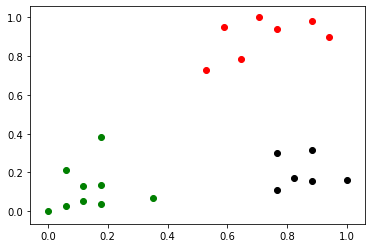

In [34]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]

plt.scatter(df1.age, df1['income($)'], color='green')
plt.scatter(df2.age, df2['income($)'], color='red')
plt.scatter(df3.age, df3['income($)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_[:,-1],color='purple',marker='+', label='centroid' )

plt.xlabel('age')
plt.ylabel('income($)')

plt.legend()

In [35]:
k_rng = range(1,10)
sse = []
for k in k_rng :
    km = KMeans(n_clusters=k)
    km.fit(df[['age', 'income($)']])
    sse.append(km.inertia_)

In [36]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2664030124668415,
 0.22020960864009392,
 0.18173811754830888,
 0.13943875937229083,
 0.10907864282306065]

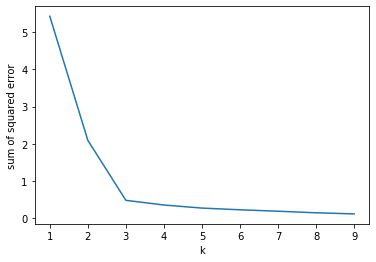

In [37]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)